#### Importation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils.layers import filter_creation
from utils.mps import mps_creation
from utils.simulation import filtration_sim

In [3]:
from matplotlib import font_manager

font_path = '../Ruda/Ruda-VariableFont_wght.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

#### Simulation

mesh: 100 elements - 825 nm

whole mesh: 120 elements - 1 um

microplastic: 12 elements - 100 nm

In [4]:
tamanho_rede = 120
mps = 250
camadas = 6

Filtro criado, 0.63
MPs criados, 0.29


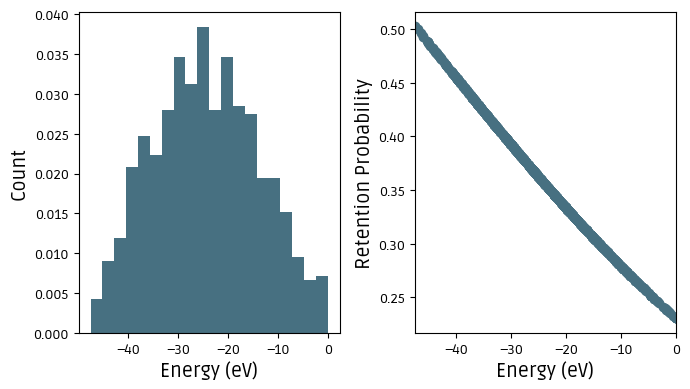

Simulação finalizada, 0.53


In [6]:
filtro = filter_creation(tamanho_rede = tamanho_rede,
                porosidade = 0.63,
                camadas = 6,
                diametro_fibra = 2,
                concentracao_cbm = 0.3,
                tamanho_cbm = 1,
                CBM=True,
                display=False)

mps_dic = mps_creation(qnt_mps = mps,
                    tamanho_limite_mp = 12,tamanho_rede=tamanho_rede)

mps_retidos,retencao_camada = filtration_sim(filtro,mps_dic,tamanho_rede=tamanho_rede,display=False,prob=False)

In [7]:
print(f'Qtd total MPs {mps}, qtd MPs retidos {mps_retidos}')
print(f'Eficiência: {100*(round(mps_retidos/mps,2))}%')

Qtd total MPs 250, qtd MPs retidos 206
Eficiência: 82.0%


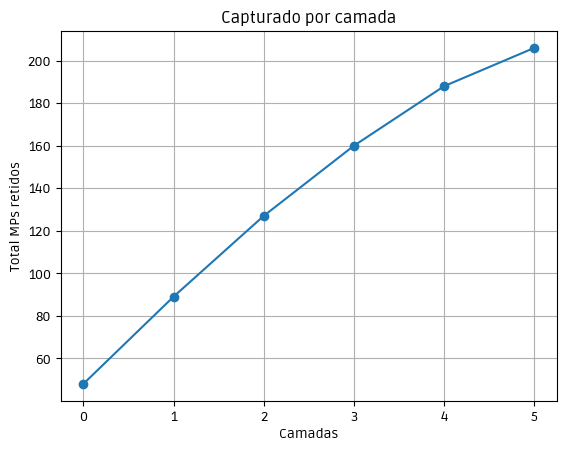

In [8]:
plt.plot(range(camadas),retencao_camada,'-o')

plt.title('Capturado por camada')
plt.xlabel('Camadas')
plt.ylabel('Total MPs retidos')

# plt.axhline(y=0,color='gray',linestyle='--')

# plt.ylim(200,1000)
plt.grid()
plt.show()

#### Statistical Confidence

In [ ]:
efficiency = []
for _ in range(100):
    
    filtro = filter_creation(tamanho_rede = tamanho_rede,
                    porosidade = 0.63,
                    camadas = 6,
                    diametro_fibra = 2,
                    concentracao_cbm = 0.3,
                    tamanho_cbm = 1,
                    CBM=True,
                    display=False)

    mps_dic = mps_creation(qnt_mps = mps,
                        tamanho_limite_mp = 12,tamanho_rede=tamanho_rede)

    mps_retidos,retencao_camada = filtration_sim(filtro,mps_dic,tamanho_rede=tamanho_rede,display=False,prob=False)
    efficiency.append(mps_retidos/mps)

#### CBM

In [4]:
tamanho_rede = 120
mps = 250
camadas = 6

In [34]:
filtro_c_cbm = filter_creation(tamanho_rede = tamanho_rede,
                porosidade = 0.63,
                camadas = 6,
                diametro_fibra = 2,
                concentracao_cbm = 0.3,
                tamanho_cbm = 1,
                CBM=True,
                display=False)

camadas_c = {}
for i in range(5):
    
    mps_dic_c_cbm = mps_creation(qnt_mps = mps,
                        tamanho_limite_mp = 12,tamanho_rede=tamanho_rede)

    mps_retidos_c_cbm,retencao_camada_c_cbm = filtration_sim(filtro_c_cbm,mps_dic_c_cbm,tamanho_rede=tamanho_rede,display=False,prob=False)

    for i,value in enumerate(retencao_camada_c_cbm):
        if i not in camadas_c: camadas_c[i] = []
        camadas_c[i].append(value)

Filtro criado, 0.41
MPs criados, 0.18
Simulação finalizada, 0.08
MPs criados, 0.25
Simulação finalizada, 0.07
MPs criados, 0.25
Simulação finalizada, 0.11
MPs criados, 0.2
Simulação finalizada, 0.06
MPs criados, 0.16
Simulação finalizada, 0.07


In [35]:
filtro_s_cbm = filter_creation(tamanho_rede = tamanho_rede,
                porosidade = 0.63,
                camadas = 6,
                diametro_fibra = 2,
                concentracao_cbm = 0.3,
                tamanho_cbm = 1,
                CBM=False,
                display=False)

camadas_s = {}
for i in range(5):
    mps_dic_s_cbm = mps_creation(qnt_mps = mps,
                        tamanho_limite_mp = 12,tamanho_rede=tamanho_rede)

    mps_retidos_s_cbm,retencao_camada_s_cbm = filtration_sim(filtro_s_cbm,mps_dic_s_cbm,tamanho_rede=tamanho_rede,display=False,prob=False)
    
    for i,value in enumerate(retencao_camada_s_cbm):
        if i not in camadas_s: camadas_s[i] = []
        camadas_s[i].append(value)

Filtro criado, 0.23
MPs criados, 0.21
Simulação finalizada, 0.04
MPs criados, 0.18
Simulação finalizada, 0.05
MPs criados, 0.21
Simulação finalizada, 0.07
MPs criados, 0.28
Simulação finalizada, 0.05
MPs criados, 0.26
Simulação finalizada, 0.05


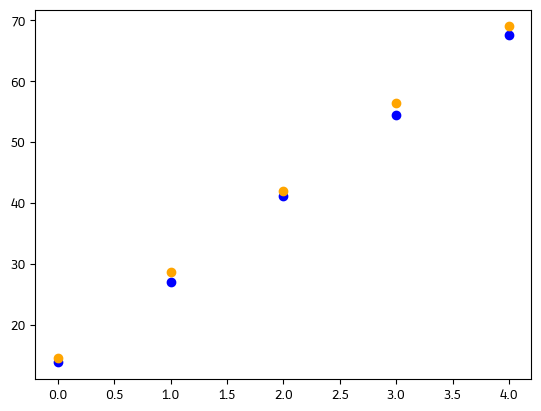

In [36]:
for i in range(5):
    plt.scatter(i,np.mean(camadas_s[i]),color='blue')
    plt.scatter(i,np.mean(camadas_c[i]),color='orange')


In [58]:
rede = filter_creation(tamanho_rede = tamanho_rede,
            porosidade = 0.63,
            camadas = 1,
            diametro_fibra = 2,
            concentracao_cbm = 0.3,
            tamanho_cbm = 1,
            CBM=True,
            display=False)[0]

Filtro criado, 0.07


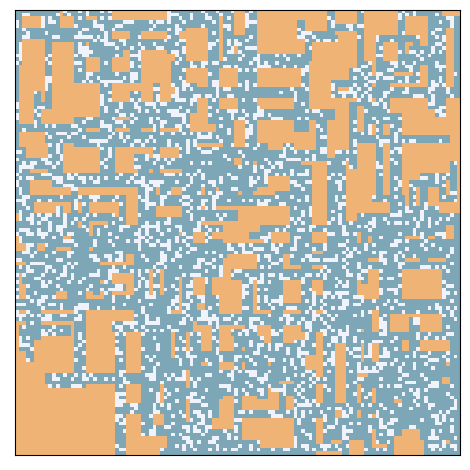

In [62]:
from matplotlib.colors import ListedColormap, BoundaryNorm

colors = ['#7DA6B7', '#EFB475', '#F0F3FC', '#F0F3FC']

cmap = ListedColormap(colors)
bounds = [-1.5, -0.5, 0.5, 1.5, 2.5]
norm = BoundaryNorm(bounds, cmap.N)
cmap.set_bad(color='#acbdef')

rede = np.where(rede == -2, np.nan, rede)

cax = plt.imshow(rede, cmap=cmap, norm=norm)
# cbar = plt.colorbar(cax, ticks=[-1,0,1,2])
# cbar.set_ticklabels(['Fiber', 'Pore', 'Microplastic', 'BARBIE1'])

plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.savefig(f'results/w_ba.svg',transparent=True,dpi=500)

plt.show()

In [49]:
c_cbm,s_cbm = [],[]

for i in range(10):

    filtro_c_cbm = filter_creation(tamanho_rede = tamanho_rede,
                porosidade = 0.63,
                camadas = 6,
                diametro_fibra = 2,
                concentracao_cbm = 0.3,
                tamanho_cbm = 1,
                CBM=True,
                display=False)
    
    mps_dic_c_cbm = mps_creation(qnt_mps = mps,
                        tamanho_limite_mp = 12,tamanho_rede=tamanho_rede)

    mps_retidos_c_cbm,retencao_camada_c_cbm = filtration_sim(filtro_c_cbm,mps_dic_c_cbm,tamanho_rede=tamanho_rede,display=False,prob=False)

    c_cbm.append(mps_retidos_c_cbm)

    filtro_s_cbm = filter_creation(tamanho_rede = tamanho_rede,
                    porosidade = 0.63,
                    camadas = 6,
                    diametro_fibra = 2,
                    concentracao_cbm = 0.3,
                    tamanho_cbm = 1,
                    CBM=False,
                    display=False)
    
    mps_dic_s_cbm = mps_creation(qnt_mps = mps,
                        tamanho_limite_mp = 12,tamanho_rede=tamanho_rede)

    mps_retidos_s_cbm,retencao_camada_s_cbm = filtration_sim(filtro_s_cbm,mps_dic_s_cbm,tamanho_rede=tamanho_rede,display=False,prob=False)
    
    s_cbm.append(mps_retidos_s_cbm)

Filtro criado, 0.83
MPs criados, 0.28
Simulação finalizada, 0.06
Filtro criado, 0.43
MPs criados, 0.32
Simulação finalizada, 0.03
Filtro criado, 0.54
MPs criados, 0.29
Simulação finalizada, 0.05
Filtro criado, 0.25
MPs criados, 0.22
Simulação finalizada, 0.04
Filtro criado, 0.54
MPs criados, 0.32
Simulação finalizada, 0.08
Filtro criado, 0.23
MPs criados, 0.19
Simulação finalizada, 0.07
Filtro criado, 0.51
MPs criados, 0.39
Simulação finalizada, 0.09
Filtro criado, 0.25
MPs criados, 0.3
Simulação finalizada, 0.04
Filtro criado, 0.59
MPs criados, 0.28
Simulação finalizada, 0.05
Filtro criado, 0.26
MPs criados, 0.29
Simulação finalizada, 0.04
Filtro criado, 0.44
MPs criados, 0.31
Simulação finalizada, 0.06
Filtro criado, 0.23
MPs criados, 0.25
Simulação finalizada, 0.03
Filtro criado, 0.54
MPs criados, 0.35
Simulação finalizada, 0.08
Filtro criado, 0.21
MPs criados, 0.2
Simulação finalizada, 0.06
Filtro criado, 0.64
MPs criados, 0.21
Simulação finalizada, 0.05
Filtro criado, 0.27
MPs cri

In [10]:
np.mean(c_cbm)/250,np.mean(s_cbm)/250,np.std(c_cbm)/250

(0.8346666666666667, 0.7693333333333334, 0.01675974011996871)

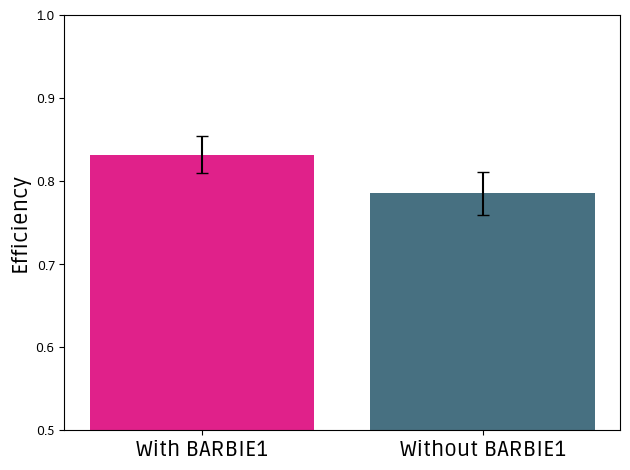

In [50]:
plt.bar('With BARBIE1',np.mean(c_cbm)/250,yerr=np.std(c_cbm)/250,color='#E0218A',capsize=4)
plt.bar('Without BARBIE1',np.mean(s_cbm)/250,yerr=np.std(s_cbm)/250,color='#477081',capsize=4)

plt.ylabel('Efficiency',fontsize=16)
# plt.barh(np.mean(c_cbm)/250,'w/CBM',xerr=np.std(c_cbm)/250)
# plt.barh(np.mean(s_cbm)/250,'wo/CBM',xerr=np.std(s_cbm)/250)

plt.xticks(fontsize=16)
plt.ylim(0.5,1)

plt.tight_layout()
plt.savefig('results/w_wo.svg',dpi=600,transparent=True)

In [18]:
print('Com CBM')
print(f'Qtd total MPs {mps}, qtd MPs retidos {mps_retidos_c_cbm}')
print(f'Eficiência: {100*(round(mps_retidos_c_cbm/mps,2))}%')

print('Sem CBM')
print(f'Qtd total MPs {mps}, qtd MPs retidos {mps_retidos_s_cbm}')
print(f'Eficiência: {100*(round(mps_retidos_s_cbm/mps,2))}%')

Com CBM
Qtd total MPs 250, qtd MPs retidos 213
Eficiência: 85.0%
Sem CBM
Qtd total MPs 250, qtd MPs retidos 193
Eficiência: 77.0%


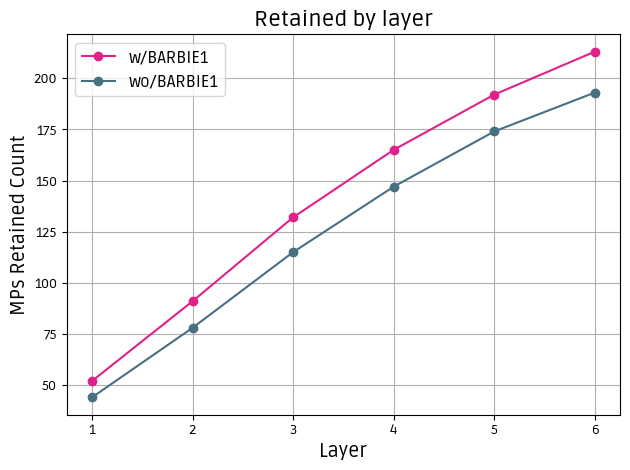

In [19]:
plt.plot(range(1,camadas+1),retencao_camada_c_cbm,'-o',label='w/BARBIE1',color='#E0218A')
plt.plot(range(1,camadas+1),retencao_camada_s_cbm,'-o',label='wo/BARBIE1',color='#477081')

plt.title('Retained by layer',fontsize=16)
plt.xlabel('Layer',fontsize=14)
plt.ylabel('MPs Retained Count',fontsize=14)

# plt.axhline(y=0,color='gray',linestyle='--')

# plt.ylim(200,1000)

plt.legend(fontsize=12),plt.grid()
plt.tight_layout()
# plt.savefig('results/w_wo.png',dpi=500,transparent=True)

plt.show()

#### PBP Comparision

In [29]:
tamanho_rede = 120
mps = 250
camadas = 6

In [53]:
b1,cbm = [],[]

for i in range(10):

    filtro_b1 = filter_creation(tamanho_rede = tamanho_rede,
                porosidade = 0.63,
                camadas = 6,
                diametro_fibra = 2,
                concentracao_cbm = 0.3,
                tamanho_cbm = 1,
                CBM=True,
                display=False)
    
    mps_dic = mps_creation(qnt_mps = mps,
                        tamanho_limite_mp = 12,tamanho_rede=tamanho_rede)

    mps_retidos_b1,retencao_camada_b1 = filtration_sim(filtro_b1,mps_dic,tamanho_rede=tamanho_rede,display=False,prob=False)

    b1.append(mps_retidos_b1)

    filtro_cbm = filter_creation(tamanho_rede = tamanho_rede,
                    porosidade = 0.63,
                    camadas = 6,
                    diametro_fibra = 2,
                    concentracao_cbm = 0.3,
                    tamanho_cbm = 1,
                    CBM=False,
                    display=False)
    
    mps_dic = mps_creation(qnt_mps = mps,
                        tamanho_limite_mp = 12,tamanho_rede=tamanho_rede)

    mps_retidos_cbm,retencao_camada_cbm = filtration_sim(filtro_cbm,mps_dic,tamanho_rede=tamanho_rede,display=False,prob=False)
    
    cbm.append(mps_retidos_cbm)

Filtro criado, 0.52
MPs criados, 0.26
Simulação finalizada, 0.04
Filtro criado, 0.17
MPs criados, 0.27
Simulação finalizada, 0.06
Filtro criado, 0.53
MPs criados, 0.22
Simulação finalizada, 0.05
Filtro criado, 0.21
MPs criados, 0.29
Simulação finalizada, 0.05
Filtro criado, 0.44
MPs criados, 0.3
Simulação finalizada, 0.05
Filtro criado, 0.21
MPs criados, 0.23
Simulação finalizada, 0.04
Filtro criado, 0.4
MPs criados, 0.2
Simulação finalizada, 0.09
Filtro criado, 0.28
MPs criados, 0.2
Simulação finalizada, 0.04
Filtro criado, 0.43
MPs criados, 0.3
Simulação finalizada, 0.04
Filtro criado, 0.2
MPs criados, 0.21
Simulação finalizada, 0.03
Filtro criado, 0.5
MPs criados, 0.31
Simulação finalizada, 0.05
Filtro criado, 0.23
MPs criados, 0.25
Simulação finalizada, 0.05
Filtro criado, 0.66
MPs criados, 0.2
Simulação finalizada, 0.07
Filtro criado, 0.24
MPs criados, 0.32
Simulação finalizada, 0.04
Filtro criado, 0.42
MPs criados, 0.28
Simulação finalizada, 0.08
Filtro criado, 0.16
MPs criados, 

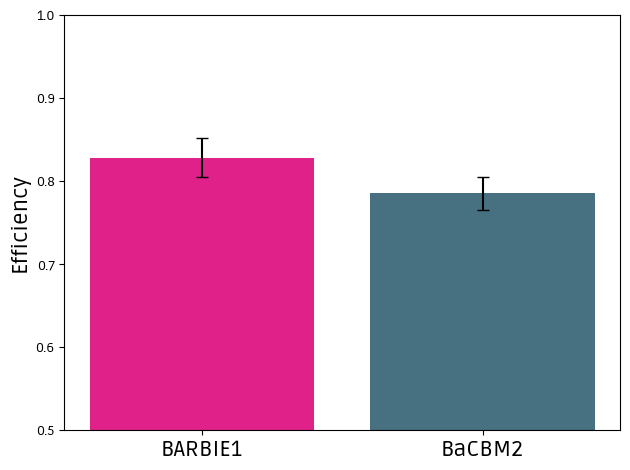

In [57]:
plt.bar('BARBIE1',np.mean(b1)/250,yerr=np.std(b1)/250,color='#E0218A',capsize=4)
plt.bar('BaCBM2',np.mean(cbm)/250,yerr=np.std(cbm)/250,color='#477081',capsize=4)

plt.ylabel('Efficiency',fontsize=16)
# plt.barh(np.mean(c_cbm)/250,'w/CBM',xerr=np.std(c_cbm)/250)
# plt.barh(np.mean(s_cbm)/250,'wo/CBM',xerr=np.std(s_cbm)/250)

plt.xticks(fontsize=16)
plt.ylim(0.5,1)

plt.tight_layout()
plt.savefig('results/b1xba.svg',dpi=600,transparent=True)

#### Porosity

In [7]:
mps=250
camadas=6

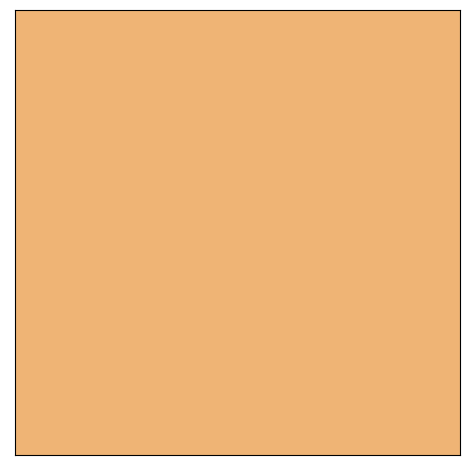

Filtro criado, 0.9
MPs criados, 0.31
Simulação finalizada, 0.06
Porosidade: 0
Qtd total MPs 250, qtd MPs retidos 0
Eficiência: 0.0%


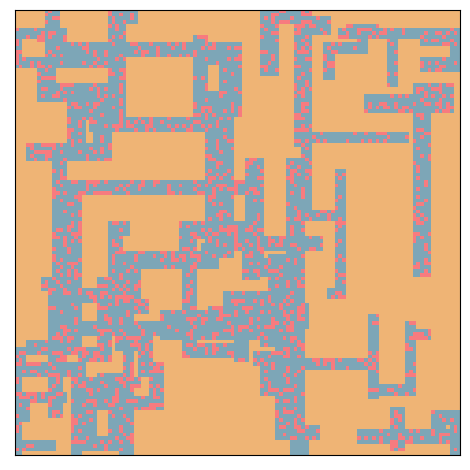

Filtro criado, 1.52
MPs criados, 0.35
Simulação finalizada, 0.05
Porosidade: 0.2
Qtd total MPs 250, qtd MPs retidos 182
Eficiência: 73.0%


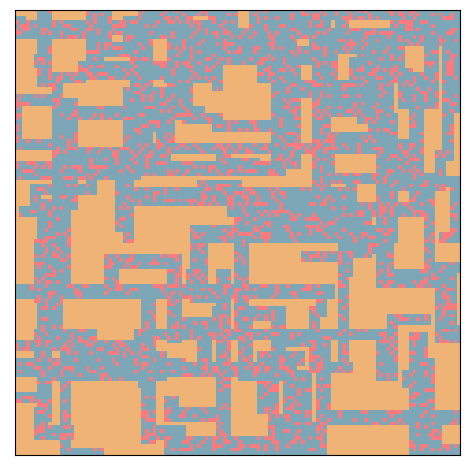

Filtro criado, 1.63
MPs criados, 0.21
Simulação finalizada, 0.04
Porosidade: 0.4
Qtd total MPs 250, qtd MPs retidos 202
Eficiência: 81.0%


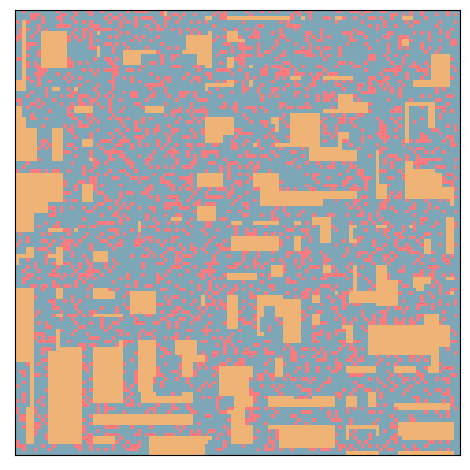

Filtro criado, 1.61
MPs criados, 0.36
Simulação finalizada, 0.04
Porosidade: 0.6
Qtd total MPs 250, qtd MPs retidos 216
Eficiência: 86.0%


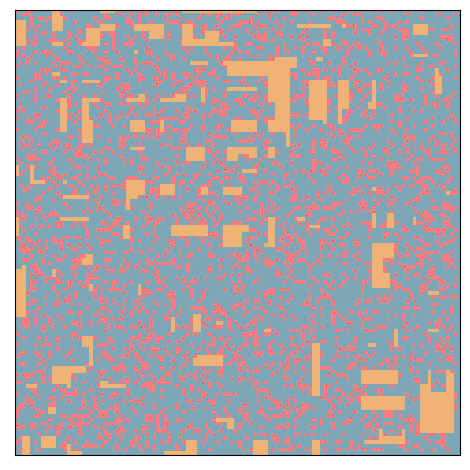

Filtro criado, 2.21
MPs criados, 0.24
Simulação finalizada, 0.05
Porosidade: 0.8
Qtd total MPs 250, qtd MPs retidos 222
Eficiência: 89.0%


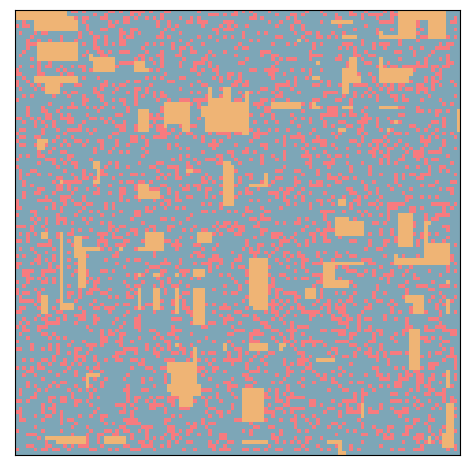

Filtro criado, 1.96
MPs criados, 0.2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Simulação finalizada, 0.03
Porosidade: 1
Qtd total MPs 250, qtd MPs retidos 228
Eficiência: 91.0%


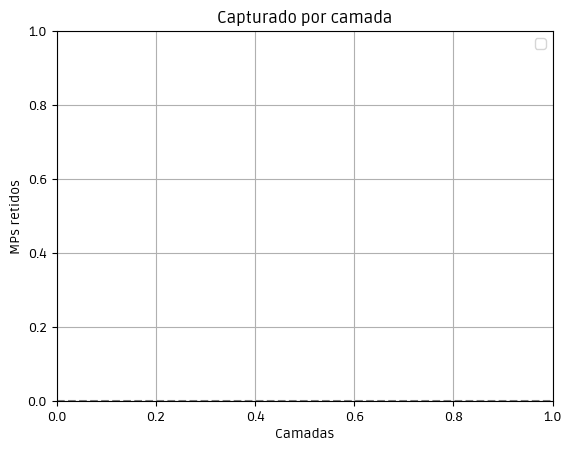

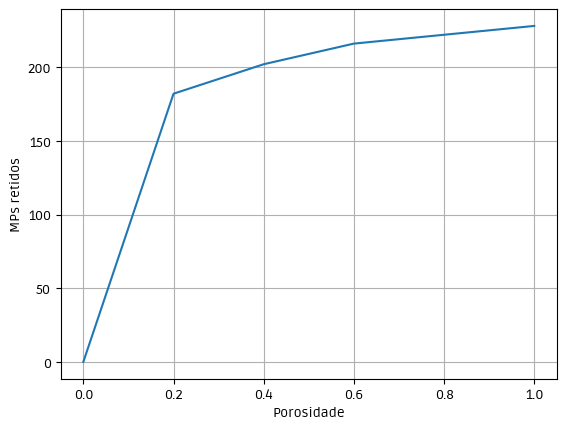

In [14]:
retencao_porosidade = []
porosidades = [0,0.2,0.4,0.6,0.8,1]

for por in porosidades:

    filtro = filter_creation(tamanho_rede = 120,
                porosidade = por,
                camadas = 6,
                diametro_fibra = 4,
                concentracao_cbm = 0.3,
                tamanho_cbm = 1,
                CBM=True,
                display=True)

    mps_dic = mps_creation(qnt_mps = 250,
                        tamanho_limite_mp = 12,tamanho_rede=120)

    mps_retidos,retencao_camada = filtration_sim(filtro,mps_dic,tamanho_rede=100,display=False)

    print(f'Porosidade: {por}')
    print(f'Qtd total MPs {mps}, qtd MPs retidos {mps_retidos}')
    print(f'Eficiência: {100*(round(mps_retidos/mps,2))}%')

    # plt.plot(range(camadas),retencao_camada,'-o',label=por)

    retencao_porosidade.append(mps_retidos)

plt.title('Capturado por camada'),plt.xlabel('Camadas'),plt.ylabel('MPs retidos')
plt.axhline(y=0,color='gray',linestyle='--')
plt.legend(),plt.grid()
plt.show()

plt.plot(porosidades,retencao_porosidade)
plt.xlabel('Porosidade'),plt.ylabel('MPs retidos'),plt.grid()
plt.show()

In [9]:
eff = []
for ret in retencao_porosidade:
    eff.append(ret/250)

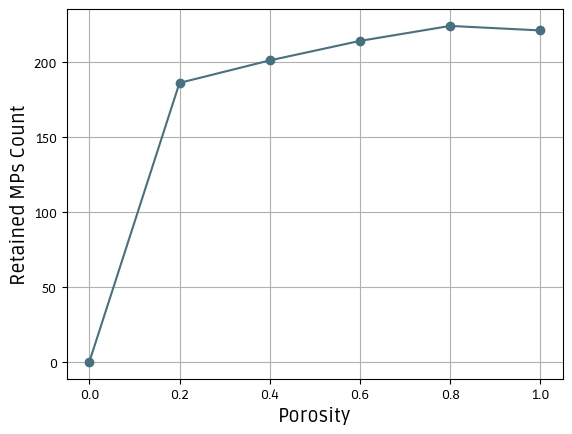

In [10]:
plt.plot(porosidades,retencao_porosidade,'o-',color='#477081')
plt.xlabel('Porosity',fontsize=14),plt.ylabel('Retained MPs Count',fontsize=14),plt.grid()
# plt.tight_layout(),plt.savefig('results/porosity.png',transparent=True,dpi=500)
plt.show()

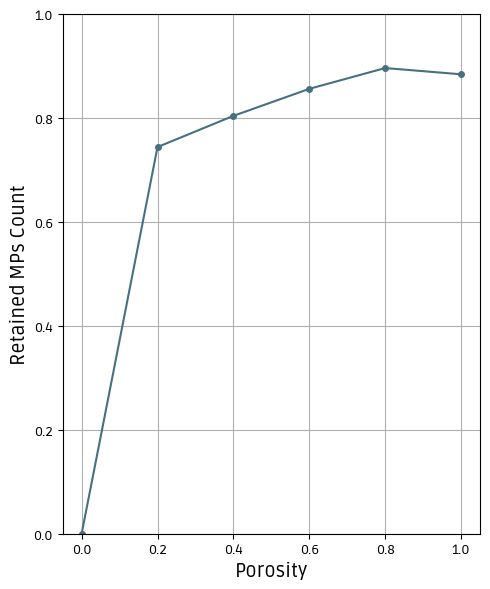

In [18]:
plt.figure(figsize=(5,6))
plt.plot(porosidades,eff,'o-',color='#477081',markersize=4)
plt.xlabel('Porosity',fontsize=14),plt.ylabel('Retained MPs Count',fontsize=14),plt.grid()
plt.ylim(0,1)
plt.tight_layout()
plt.savefig('results/porosity.png',transparent=True,dpi=800)
plt.show()